In [1]:
import numpy as np
from autoencoder import VAE
from tensorflow import keras

In [2]:
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
mnist_digits = np.concatenate([x_train, x_test], axis=0)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255
latent_dim = 2
input_shape_ = mnist_digits.shape[1:]
vae = VAE(latent_dim=latent_dim , input_shape_=input_shape_)
vae.compile(optimizer=keras.optimizers.Adam(), run_eagerly=True)


In [3]:
vae.fit(mnist_digits, epochs=30, batch_size= 128 , verbose = 2)

Epoch 1/30
547/547 - 22s - total_loss: 210.4165 - reconstruction_loss: 208.1850 - kl_loss: 2.2317 - 22s/epoch - 39ms/step
Epoch 2/30
547/547 - 13s - total_loss: 177.0967 - reconstruction_loss: 173.6630 - kl_loss: 3.4336 - 13s/epoch - 25ms/step
Epoch 3/30
547/547 - 13s - total_loss: 164.4855 - reconstruction_loss: 160.6761 - kl_loss: 3.8094 - 13s/epoch - 25ms/step
Epoch 4/30
547/547 - 13s - total_loss: 160.1438 - reconstruction_loss: 156.2281 - kl_loss: 3.9155 - 13s/epoch - 24ms/step
Epoch 5/30
547/547 - 13s - total_loss: 157.6295 - reconstruction_loss: 153.6593 - kl_loss: 3.9702 - 13s/epoch - 24ms/step
Epoch 6/30
547/547 - 14s - total_loss: 156.0571 - reconstruction_loss: 152.0762 - kl_loss: 3.9808 - 14s/epoch - 26ms/step
Epoch 7/30
547/547 - 13s - total_loss: 154.8229 - reconstruction_loss: 150.8363 - kl_loss: 3.9866 - 13s/epoch - 24ms/step
Epoch 8/30
547/547 - 14s - total_loss: 153.7827 - reconstruction_loss: 149.8119 - kl_loss: 3.9707 - 14s/epoch - 25ms/step
Epoch 9/30
547/547 - 13s

In [5]:
%%capture
import matplotlib.pyplot as plt

n = 30
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))

grid_x = np.linspace(-1, 1, n)
grid_y = np.linspace(-1, 1, n)[::-1]

for i, yi in enumerate(grid_y):
    for j, xi in enumerate(grid_x):
        z_sample = np.array([[xi, yi]])
        x_decoded = vae.decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[
            i * digit_size : (i + 1) * digit_size,
            j * digit_size : (j + 1) * digit_size,
        ] = digit


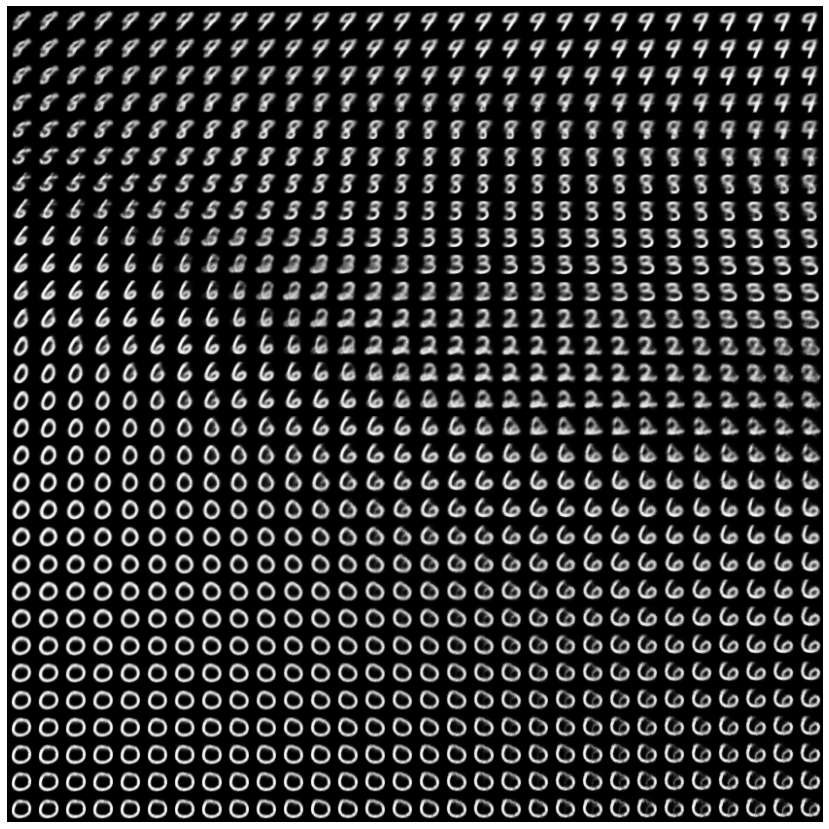

In [6]:
plt.figure(figsize=(15, 15))
start_range = digit_size // 2
end_range = n * digit_size + start_range
pixel_range = np.arange(start_range, end_range, digit_size)
sample_range_x = np.round(grid_x, 1)
sample_range_y = np.round(grid_y, 1)
plt.xticks(pixel_range, sample_range_x)
plt.yticks(pixel_range, sample_range_y)
plt.xlabel("z[0]")
plt.ylabel("z[1]")
plt.axis("off")
plt.imshow(figure, cmap="Greys_r")